# Clustering

Reproducing clusters from paper. 

**validation targets**

Two clusters:
* Cluster 1: 3401 CpGs and 160 genes
* Cluster 2: 3601 CpGs and 270 genes

Attempt:
* Upscale p-values
* Cluster reg coeffs 
* Implement score metric to evaluate
    * Consensus score
* Apply other biclsutering algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.metrics import consensus_score

%matplotlib inline

In [13]:
path_to_file = './../data/./../data/significant_pvalues_prep.csv'
#path_to_file = './../data/./../data/significant_pcc_prep.csv'
data = pd.read_csv(path_to_file, index_col=0)

In [3]:
data.head()

,TNFRSF4,MXRA8,ATAD3A,MMP23B,SLC35E2,MORN1,KCNAB2,KLHL21,TNFRSF9,ENO1,...,ATP11C,CXorf40B,MAGEA4,MAGEA12,CETN2,PNMA5,PNMA3,TREX2,ARHGAP4,FLNA
cg00002224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00002426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00002593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00002719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00003287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(27561, 2664)

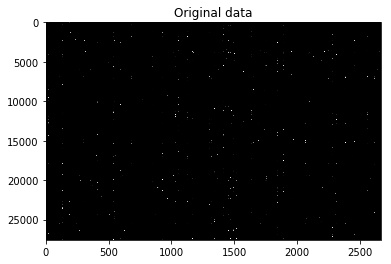

In [14]:
plt.figure()
plt.imshow(data.values, cmap=plt.cm.gray, interpolation='nearest', aspect='auto')
plt.title('Original data')
plt.savefig('./../imgs/org_sign_pvalues.png')
#plt.savefig('./../imgs/org_sign_ppc.png')

# Spectral biclustering

Assumes the input data matrix has a hidden checkerboard structure.

In [6]:
from sklearn.cluster.bicluster import SpectralBiclustering

In [15]:
biclust = SpectralBiclustering(
    n_clusters=2, 
    method='log', 
    n_components=10,
    svd_method='randomized', 
    n_best=10,
    n_svd_vecs=10,
    mini_batch=False,
    random_state=0
)
biclust.fit(data)
biclust_score = consensus_score(
    biclust.biclusters_, (rows[:, row_idx], columns[:, col_idx])
)
print("consensus score: {:.1f}".format(biclust_score))

SpectralBiclustering(init='k-means++', method='log', mini_batch=False,
           n_best=10, n_clusters=2, n_components=10, n_init=10, n_jobs=1,
           n_svd_vecs=10, random_state=0, svd_method='randomized')

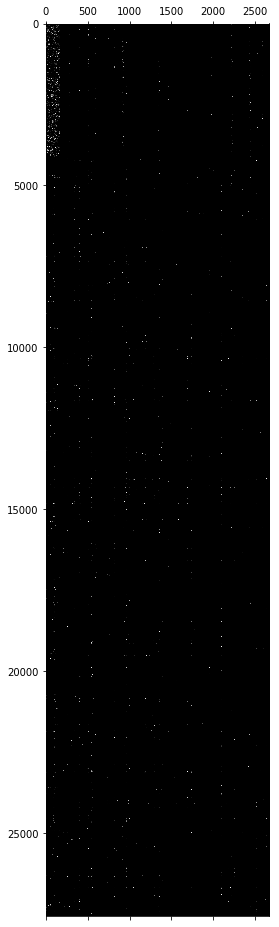

In [16]:
biclust_fit_data = data.iloc[np.argsort(biclust.row_labels_)]
biclust_fit_data = biclust_fit_data.iloc[:, np.argsort(biclust.column_labels_)]

plt.figure(figsize=(4, 10))
plt.matshow(biclust_fit_data, cmap=plt.cm.gray, interpolation='nearest', aspect='auto')
plt.savefig('./../imgs/sign_pvalues_spectral_biclust.png')
#plt.savefig('./../imgs/sign_ppc_spectral_biclust.png')

# Spectral coclustering

In [17]:
from sklearn.cluster.bicluster import SpectralCoclustering

In [18]:
coclust = SpectralCoclustering(
    n_clusters=2, 
    svd_method='randomized',
    n_svd_vecs=10,
    mini_batch=False,
    random_state=0
)
coclust.fit(data)
coclust_score = consensus_score(
    coclust.biclusters_, (rows[:, row_idx], columns[:, col_idx])
)
print("consensus score: {:.1f}".format(coclust_score))

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=2,
           n_init=10, n_jobs=1, n_svd_vecs=10, random_state=0,
           svd_method='randomized')

In [19]:
coclust_fit_data = data.iloc[np.argsort(coclust.row_labels_)]
coclust_fit_data = coclust_fit_data.iloc[:, np.argsort(coclust.column_labels_)]

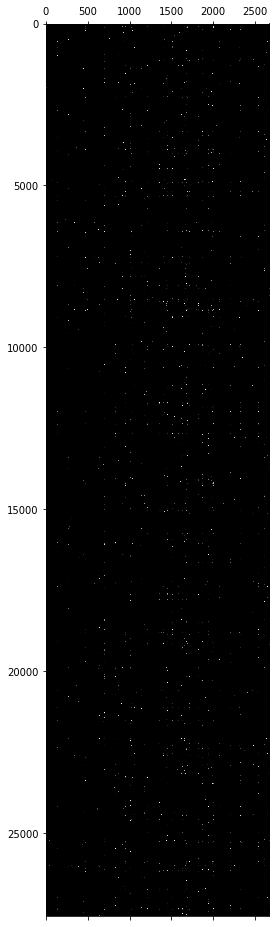

In [20]:
plt.figure(figsize=(30, 10))
plt.matshow(coclust_fit_data, cmap=plt.cm.gray, interpolation='nearest', aspect='auto')
plt.savefig('./../imgs/sing_pvalues_coclust.png')